# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data gives the Rate, Verbal and Math scores by State. 

##### 2. Does the data look complete? Are there any obvious issues with the observations?

The data looks complete, however it's not clear what the "Rate" column contains (Rate is just not a sufficiently descriptive column title to make that determination)

##### 3. Create a data dictionary for the dataset.

(per discussion with Lucy, ignoring this since dictionary/lists are created for data over subsequent sections)

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [2]:
# Import csv module, open the csv in universal newline mode, create a list "data" 
# and populate it with lists representing each row in the csv.

import csv
with open("sat_scores.csv","U") as f:
    reader = csv.reader(f)
    data = []
    for row in reader:
        data.append(row)

##### 5. Print the data

In [3]:
print data

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [4]:
labels = data.pop(0) # removes first row and returns it
print labels # checking contents of labels

['State', 'Rate', 'Verbal', 'Math']


##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [5]:
# creates a new list states for state names. finds the index corresponding with "State" column
# and populates the value at that index of every row into states.

states = []
for i in range(len(labels)):
    if labels[i] == "State":
        stateIndex = i
        break
for row in data:
    states.append(row[stateIndex])
print states

['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NB', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS']


##### 8. Print the types of each column

In [6]:
# assuming we can use the first row to generalize across full columns
for i in range(len(data[1])):
    print i, type(data[1][i])

0 <type 'str'>
1 <type 'str'>
2 <type 'str'>
3 <type 'str'>


##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [7]:
# State column is OK as a str, but the Rate, Math and Verbal columns need to be integers
# run through data and update columns 2,3,4 (index 1,2,3) to be integer type rather than string

for row in data:
    row[1] = int(row[1])
    row[2] = int(row[2])
    row[3] = int(row[3])
    

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [8]:
# create 3 dictionaries, with key:value pairs of State:Rate, State: Verbal,
# State: Math, then print them

stateRate = {}
for row in data:
    stateRate.update({row[0]:row[1]})
    
stateVerbal = {}
for row in data:
    stateVerbal.update({row[0]:row[2]})
        
stateMath = {}
for row in data:
    stateMath.update({row[0]:row[3]})
    


## Step 3: Describe the data

##### 12. Print the min and max of each column

In [9]:
# Create 3 lists: Rate, Verbal and Math. Print Min, Max of each of these

Rate = []
Verbal = []
Math = []

for state in stateRate:
    Rate.append(stateRate[state])
    
print "Min Rate %d, Max Rate %d" % (min(Rate), max(Rate))

for state in stateVerbal:
    Verbal.append(stateVerbal[state])
    
print "Min Verbal %d, Max Verbal %d" % (min(Verbal), max(Verbal))

for state in stateMath:
    Math.append(stateMath[state])
    
print "Min Math %d, Max Math %d" % (min(Math), max(Math))


Min Rate 4, Max Rate 82
Min Verbal 482, Max Verbal 593
Min Math 439, Max Math 603


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [10]:
# myStDev(nums) takes a list of numbers and computes the standard deviation
# by calculating the mean, creating a list of squared diff from the mean, 
# finding the average of that list (ie variance) and taking the square root
# of variance to arrive at standard deviation.
import numpy as np
from numpy import mean
def myStDev(nums):
    myMean = mean(nums)
    squaredDist = [(x-myMean)**2 for x in nums]
    variance = mean(squaredDist)
    stDev = variance**.5
    return stDev
    

print "The standard deviation of Rate is %f." % (myStDev(Rate))
print "The standard deviation of Verbal is %f." % (myStDev(Verbal))
print "The standard deviation of Math is %f." % (myStDev(Math))

The standard deviation of Rate is 27.279239.
The standard deviation of Verbal is 33.031983.
The standard deviation of Math is 35.929873.


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

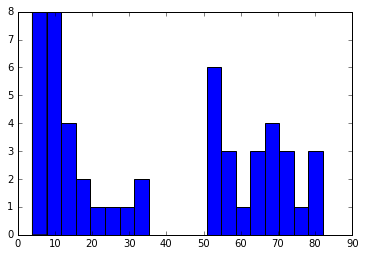

In [28]:
# import matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# use hist() function to plot a histogram. Using 20 buckets to give a sense of the distribution
plt.hist(Rate,20)
plt.show()

##### 15. Plot the Math distribution

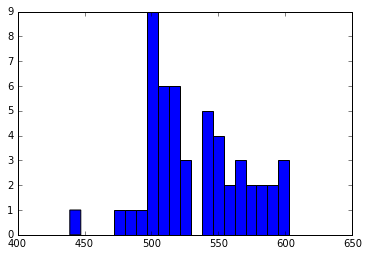

In [27]:
# Math histogram using 20 buckets
plt.hist(Math,20)
plt.show()

##### 16. Plot the Verbal distribution

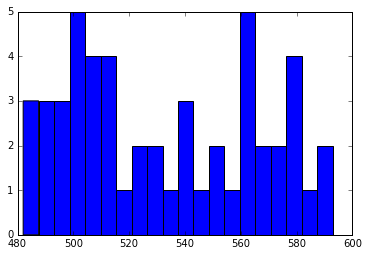

In [26]:
# Verbal histogram using 20 buckets
plt.hist(Verbal,20)
plt.show()

##### 17. What is the typical assumption for data distribution?

    With many types of data (but not all), the assumption is that the distribution will be roughly normal/Gaussian.

##### 18. Does that distribution hold true for our data?

No, the Rate, Math and Verbal distributions do not seem to approximate a normal distribution. However, 50 is a small sample size. It is quite possible that over a more granular data set (say, the scores for every individual student taking the SAT rather than average by state) we would see more of a gaussian distribution. 

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

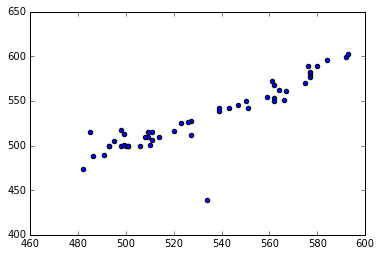

In [24]:
# print scatterplot of Verbal vs Math scores

plt.scatter(Verbal,Math)
plt.show()

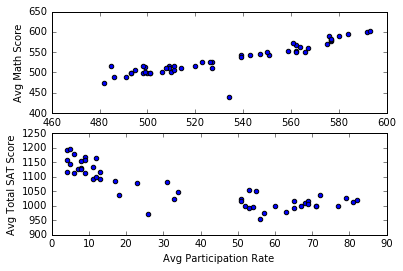

In [34]:
# bonus: use PyPlot figure to show multiple plots at once
# note - I realize that the labels don't show well here but didn't want to
# waste time looking up how to fix this once I saw the comment about
# most DS people using easier tools like seaborn or tableau instead!

fig = plt.figure()

# add a new subplot

ax1 = fig.add_subplot(211)

# set labels for first plot
ax1.set_xlabel("Avg Verbal Score")
ax1.set_ylabel("Avg Math Score")

# fill in subplot with Verbal v Math data
ax1.scatter(Verbal, Math)

# add a 2nd subplot, set its labels, and fill in with Total score v Rate data
ax2 = fig.add_subplot(212)
ax2.set_xlabel("Avg Participation Rate")
ax2.set_ylabel("Avg Total SAT Score")
ax2.scatter(Rate, np.array(Verbal) + np.array(Math))

# print figure
plt.show()





##### 20. Are there any interesting relationships to note?

As we might expect, math and verbal scores are quite correlated - ie, states with high average math scores also have high average verbal scores. This makes sense in that we expect better quality education to improve both math and verbal SAT scores roughly in tandem. One major exception to this is the obvious outlier point, which is (Verbal, Math) (534, 439) from Ohio. Ohio's poor Math performance relative to where other states with similar Verbal performance lie, suggests that it could perform better if it made changes to its Math education program to bring it in line with other states.

Less intuitively, there appears to be some negative correlation between participation rate and overall SAT score in each state. The reason for this relationship would require further analysis. Perhaps some states have incentive programs encouraging all high school students to take the SAT, whereas in others only highly self-motivated students (a quality correlated with higher test scores) take the test.

##### 21. Create box plots for each variable. 

Rate Boxplot


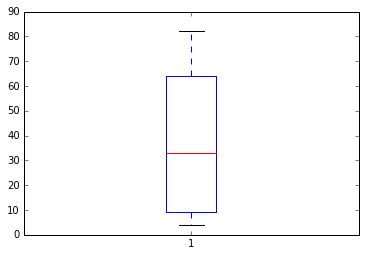

Verbal Boxplot


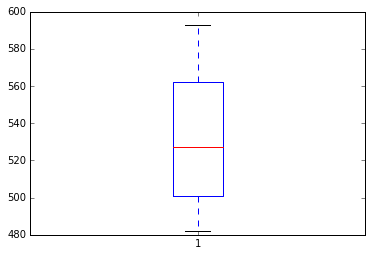

Math Boxplot


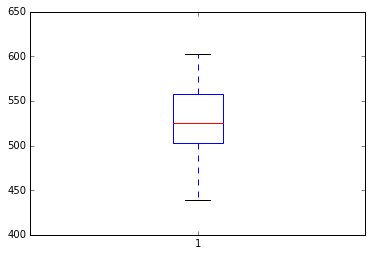

In [36]:
# create & print simple box plot for each of the 3 variables: Rate,
# Verbal and Math

plt.boxplot(Rate)
print "Rate Boxplot"
plt.show()

plt.boxplot(Verbal)
print "Verbal Boxplot"
plt.show()

plt.boxplot(Math)
print "Math Boxplot"
plt.show()

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

Submitting separately in a tableau workbook